In this cell, I imported the essential libraries such as **pandas** for data handling, **numpy** for numerical operations, **nltk** and **TextBlob** for text processing and sentiment analysis, and various machine learning modules like **MultinomialNB** and **train_test_split** for classification tasks. These libraries will help me analyze and process data efficiently.

In [1]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



Here, I used Kaggle’s API to download the cars dataset by running a command to download the dataset **dhamur/cars-data**. This command automates the process of fetching the required data for the project.

In [2]:
!kaggle datasets download -d dhamur/cars-data

Dataset URL: https://www.kaggle.com/datasets/dhamur/cars-data
License(s): CC0-1.0
cars-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In this step, I extracted the downloaded dataset from the zip file and verified the files inside it by listing the contents. This is important to ensure that the data has been successfully downloaded and extracted.

In [3]:
import zipfile
import os

# Extract the dataset from the downloaded zip file
with zipfile.ZipFile("cars-data.zip", 'r') as zip_ref:
    zip_ref.extractall("cars_data")

# List files to verify extraction
os.listdir("cars_data")


['Cars 1.csv',
 'cars.csv',
 'Electric Car.csv',
 'Electric Vehicle Population Data.csv',
 'FEV data.xlsx']

In this cell, I loaded multiple CSV files and one Excel file into pandas DataFrames. This allowed me to explore the structure of the datasets. I also displayed the first few rows of each DataFrame to understand their structure and ensure that they were correctly loaded.

In [4]:
import pandas as pd

# List the files in the extracted directory
files = os.listdir("cars_data")
print("Files in the dataset:", files)

# Load each CSV file into a pandas DataFrame
df1 = pd.read_csv("cars_data/Cars 1.csv")
df2 = pd.read_csv("cars_data/cars.csv")
df3 = pd.read_csv("cars_data/Electric Car.csv")
df4 = pd.read_csv("cars_data/Electric Vehicle Population Data.csv")

# If there's an Excel file, load it as well
excel_df = pd.read_excel("cars_data/FEV data.xlsx")

# Display the first few rows of each DataFrame to understand their structure
print("Data from file1.csv:")
print(df1.head())

print("Data from file2.csv:")
print(df2.head())

print("Data from file3.csv:")
print(df3.head())

print("Data from file4.csv:")
print(df4.head())

print("Data from excel_file.xlsx:")
print(excel_df.head())


Files in the dataset: ['Cars 1.csv', 'cars.csv', 'Electric Car.csv', 'Electric Vehicle Population Data.csv', 'FEV data.xlsx']
Data from file1.csv:
   Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                140                143               202   
1                140                143               202   
2                140                143               202   
3                140                143               202   
4                140                143               202   

  Engine Information.Driveline                Engine Information.Engine Type  \
0              All-wheel drive          Audi 3.2L 6 cylinder 250hp 236ft-lbs   
1            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
2            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
3              All-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
4              All-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   

   En

Here, I handled **df2** by splitting its single column, which contained multiple attributes separated by semicolons, into separate columns. After splitting, I renamed the columns to make them more descriptive and easier to work with. Additionally, I printed the updated column names of all the datasets for verification.

In [5]:
# Cell 5: Process df2

import pandas as pd
import os

# Load each CSV file into a pandas DataFrame
df1 = pd.read_csv("cars_data/Cars 1.csv")
df2 = pd.read_csv("cars_data/cars.csv")
df3 = pd.read_csv("cars_data/Electric Car.csv")
df4 = pd.read_csv("cars_data/Electric Vehicle Population Data.csv")

# If there's an Excel file, load it as well
excel_df = pd.read_excel("cars_data/FEV data.xlsx")

# Split the single column in df2 into separate columns
df2_split = df2['Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin'].str.split(';', expand=True)

# Rename columns in df2
df2_split.columns = ['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']

# Update df2 with the split and renamed columns
df2 = df2_split

# Display the updated column names of each DataFrame
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)
print("Columns in df3:", df3.columns)
print("Columns in df4:", df4.columns)
print("Columns in excel_df:", excel_df.columns)


Columns in df1: Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Hybrid',
       'Engine Information.Number of Forward Gears',
       'Engine Information.Transmission', 'Fuel Information.City mpg',
       'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')
Columns in df2: Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')
Columns in df3: Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 

I now have well-defined columns in each dataset for further analysis, making data handling easier. 

I standardized the column names across all the DataFrames by converting them to lowercase and replacing spaces with underscores. This helps maintain consistency and makes the columns easier to reference during analysis.

In [6]:
# Standardize column names
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(';', '_').str.replace(' ', '_')
df3.columns = df3.columns.str.lower().str.replace(' ', '_')
df4.columns = df4.columns.str.lower().str.replace(' ', '_')
excel_df.columns = excel_df.columns.str.lower().str.replace(' ', '_')

# Display the updated column names
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)
print("Columns in df3:", df3.columns)
print("Columns in df4:", df4.columns)
print("Columns in excel_df:", excel_df.columns)


Columns in df1: Index(['dimensions.height', 'dimensions.length', 'dimensions.width',
       'engine_information.driveline', 'engine_information.engine_type',
       'engine_information.hybrid',
       'engine_information.number_of_forward_gears',
       'engine_information.transmission', 'fuel_information.city_mpg',
       'fuel_information.fuel_type', 'fuel_information.highway_mpg',
       'identification.classification', 'identification.id',
       'identification.make', 'identification.model_year',
       'identification.year',
       'engine_information.engine_statistics.horsepower',
       'engine_information.engine_statistics.torque'],
      dtype='object')
Columns in df2: Index(['car', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin'],
      dtype='object')
Columns in df3: Index(['brand', 'model', 'accelsec', 'topspeed_kmh', 'range_km',
       'efficiency_whkm', 'fastcharge_kmh', 'rapidcharge', 'powertrain',
       'plugtype', 

The columns across all DataFrames now follow a consistent naming convention.

In this cell, I calculated the cost per kilometer for electric vehicles in **df3** and **excel_df**. I used the efficiency in Wh/km and the electricity price (set at $0.12 per kWh) to compute the electric cost per km. This will allow me to compare the costs of running electric vehicles with traditional fuel-based cars.

In [7]:
# Define the electricity price per kWh (for example, $0.12 per kWh)
electricity_price_per_kwh = 0.12

# Calculate the cost of electricity for electric vehicles in df3
df3['electric_cost_per_km'] = df3['efficiency_whkm'] / 1000 * electricity_price_per_kwh

# For `excel_df`, convert energy consumption to kWh/100 km (if needed) and calculate cost
excel_df['energy_consumption_kwh_per_100km'] = excel_df['mean_-_energy_consumption_[kwh/100_km]']
excel_df['electric_cost_per_km'] = excel_df['energy_consumption_kwh_per_100km'] / 100 * electricity_price_per_kwh

# Display the cost calculations
print("Electric cost per km in df3:")
print(df3[['brand', 'model', 'electric_cost_per_km']])

print("Electric cost per km in excel_df:")
print(excel_df[['make', 'model', 'electric_cost_per_km']])


Electric cost per km in df3:
           brand                            model  electric_cost_per_km
0         Tesla     Model 3 Long Range Dual Motor               0.01932
1    Volkswagen                         ID.3 Pure               0.02004
2      Polestar                                 2               0.02172
3           BMW                              iX3                0.02472
4         Honda                                e                0.02016
..           ...                              ...                   ...
98       Nissan                       Ariya 63kWh               0.02292
99         Audi     e-tron S Sportback 55 quattro               0.03096
100      Nissan               Ariya e-4ORCE 63kWh               0.02328
101      Nissan   Ariya e-4ORCE 87kWh Performance               0.02784
102       Byton                 M-Byte 95 kWh 2WD               0.02856

[103 rows x 3 columns]
Electric cost per km in excel_df:
             make                         model  

I successfully calculated the electric cost per kilometer for both datasets and can now use this data for comparisons.

Here, I printed the columns of **df1** to verify that they had been standardized properly.

In [8]:
print(df1.columns)


Index(['dimensions.height', 'dimensions.length', 'dimensions.width',
       'engine_information.driveline', 'engine_information.engine_type',
       'engine_information.hybrid',
       'engine_information.number_of_forward_gears',
       'engine_information.transmission', 'fuel_information.city_mpg',
       'fuel_information.fuel_type', 'fuel_information.highway_mpg',
       'identification.classification', 'identification.id',
       'identification.make', 'identification.model_year',
       'identification.year',
       'engine_information.engine_statistics.horsepower',
       'engine_information.engine_statistics.torque'],
      dtype='object')


I computed the fuel cost per kilometer for conventional vehicles based on **city and highway MPG** in **df1 and df2**. Using the **fuel price** (set at $3.50 per gallon), I converted the **fuel efficiency** from MPG to cost per kilometer. This calculation will later allow a comparison between fuel and electric costs.


In [9]:
# Define the fuel price per gallon (for example, $3.50 per gallon)
fuel_price_per_gallon = 3.50

# Convert relevant columns to numeric, forcing errors to NaN
df1['fuel_information.city_mpg'] = pd.to_numeric(df1['fuel_information.city_mpg'], errors='coerce')
df1['fuel_information.highway_mpg'] = pd.to_numeric(df1['fuel_information.highway_mpg'], errors='coerce')

df2['mpg'] = pd.to_numeric(df2['mpg'], errors='coerce')

# Convert MPG to fuel cost per km
# There are approximately 0.621371 miles in a kilometer
df1['fuel_cost_per_km_city'] = (1 / df1['fuel_information.city_mpg']) * 0.621371 * fuel_price_per_gallon
df1['fuel_cost_per_km_highway'] = (1 / df1['fuel_information.highway_mpg']) * 0.621371 * fuel_price_per_gallon

# For `df2`, similar calculations
df2['fuel_cost_per_km'] = (1 / df2['mpg']) * 0.621371 * fuel_price_per_gallon

# Display the cost calculations
print("Fuel cost per km in df1 (city):")
print(df1[['identification.make', 'identification.model_year', 'fuel_cost_per_km_city']])

print("Fuel cost per km in df1 (highway):")
print(df1[['identification.make', 'identification.model_year', 'fuel_cost_per_km_highway']])

print("Fuel cost per km in df2:")
print(df2[['car', 'fuel_cost_per_km']])


Fuel cost per km in df1 (city):
     identification.make         identification.model_year  \
0                   Audi                      2009 Audi A3   
1                   Audi                      2009 Audi A3   
2                   Audi                      2009 Audi A3   
3                   Audi                      2009 Audi A3   
4                   Audi                      2009 Audi A3   
...                  ...                               ...   
5071               Honda                  2012 Honda Pilot   
5072         Lamborghini    2012 Lamborghini Gallardo Coup   
5073         Lamborghini  2012 Lamborghini Gallardo Spyder   
5074                 BMW                 2012 BMW 7 Series   
5075                 BMW                 2012 BMW 7 Series   

      fuel_cost_per_km_city  
0                  0.120822  
1                  0.098854  
2                  0.103562  
3                  0.103562  
4                  0.103562  
...                     ...  
5071         

 I computed the fuel cost for both city and highway driving, which provides insights into how conventional cars compare in terms of running costs.

 In the next step, I calculated the average cost per kilometer for both electric and conventional cars. This gives me a summary of running costs for **electric vehicles** **(df3 and excel_df)** and for **fuel-powered vehicles** **(df1 and df2)**.

In [10]:
import pandas as pd

# Assuming df3 and excel_df are DataFrames for electric costs, and df1 and df2 are for fuel costs

# Calculate average electric cost per km from df3 and excel_df
average_electric_cost_df3 = df3['electric_cost_per_km'].mean()
average_electric_cost_excel_df = excel_df['electric_cost_per_km'].dropna().mean()

# Calculate average fuel cost per km for city and highway from df1
average_fuel_cost_city = df1['fuel_cost_per_km_city'].dropna().mean()
average_fuel_cost_highway = df1['fuel_cost_per_km_highway'].dropna().mean()

# Calculate average fuel cost per km from df2
average_fuel_cost_df2 = df2['fuel_cost_per_km'].dropna().mean()

# Print the averages
print(f"Average electric cost per km in df3: {average_electric_cost_df3:.5f}")
print(f"Average electric cost per km in excel_df: {average_electric_cost_excel_df:.5f}")
print(f"Average fuel cost per km (city) in df1: {average_fuel_cost_city:.5f}")
print(f"Average fuel cost per km (highway) in df1: {average_fuel_cost_highway:.5f}")
print(f"Average fuel cost per km in df2: {average_fuel_cost_df2:.5f}")


Average electric cost per km in df3: 0.02270
Average electric cost per km in excel_df: 0.02279
Average fuel cost per km (city) in df1: 0.13492
Average fuel cost per km (highway) in df1: 0.09617
Average fuel cost per km in df2: inf


I created a bar chart to visually compare the average cost per kilometer for electric and fuel-powered vehicles. This visualization makes it easier to compare running costs between vehicle types.

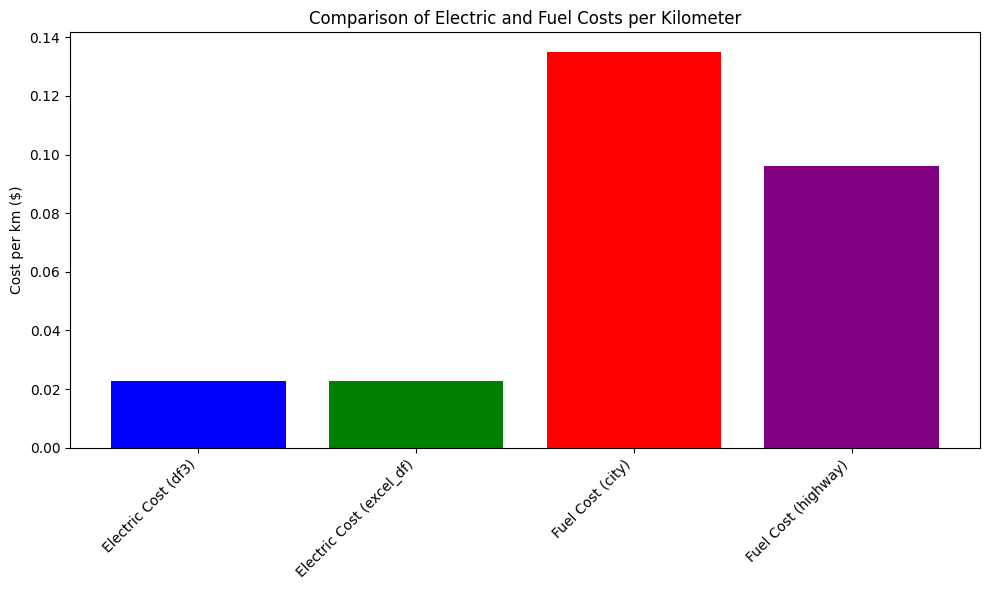

In [11]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Electric Cost (df3)', 'Electric Cost (excel_df)', 'Fuel Cost (city)', 'Fuel Cost (highway)', 'Fuel Cost (df2)']
values = [average_electric_cost_df3, average_electric_cost_excel_df, average_fuel_cost_city, average_fuel_cost_highway, average_fuel_cost_df2]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Cost per km ($)')
plt.title('Comparison of Electric and Fuel Costs per Kilometer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Clearly, electric vehicles have a significantly lower cost per kilometer compared to fuel-powered cars.

Here, I extracted energy consumption data (Wh/km) for electric vehicles from **df3** to analyze the energy efficiency of EVs.

In [24]:
# Energy consumption per km
energy_consumption_ev = df3[['brand', 'model', 'efficiency_whkm']].dropna()



In this cell, I extracted the fuel efficiency data for conventional cars in terms of miles per gallon (MPG) from **df1**. This data will later help in efficiency comparisons.



In [25]:
# Fuel efficiency in terms of distance per liter
fuel_efficiency_conventional = df1[['identification.make', 'identification.model_year', 'fuel_information.city_mpg', 'fuel_information.highway_mpg']].dropna()


I calculated the average energy efficiency of electric vehicles based on their Wh/km values. This metric provides insights into how much energy an EV consumes per kilometer.

In [26]:
# Calculate the average efficiency of EVs (in Wh/km)
average_efficiency_ev = energy_consumption_ev['efficiency_whkm'].mean()

# Print the average efficiency
print(f"The average efficiency of EVs is {average_efficiency_ev:.2f} Wh/km")


The average efficiency of EVs is 189.17 Wh/km


Here, I calculated the average city fuel efficiency for conventional cars. This value will later be compared with highway fuel efficiency and electric vehicle efficiency.

In [27]:
# Calculate the average city MPG
average_city_mpg = fuel_efficiency_conventional['fuel_information.city_mpg'].mean()

# Print the average city MPG
print(f"The average city fuel efficiency is {average_city_mpg:.2f} miles per gallon")


The average city fuel efficiency is 17.28 miles per gallon


I calculated the average highway fuel efficiency of conventional cars to compare it against city fuel efficiency and EV energy consumption.

In [28]:
# Calculate the average highway MPG
average_highway_mpg = fuel_efficiency_conventional['fuel_information.highway_mpg'].mean()

# Print the average highway MPG
print(f"The average highway fuel efficiency is {average_highway_mpg:.2f} miles per gallon")


The average highway fuel efficiency is 24.13 miles per gallon


I calculated the combined fuel efficiency as the average of city and highway MPG. This gives a general sense of how efficient conventional cars are across different driving conditions.

In [29]:
# Calculate the combined MPG as a simple average of city and highway MPG
combined_mpg = (average_city_mpg + average_highway_mpg) / 2

# Print the combined MPG
print(f"The combined fuel efficiency is {combined_mpg:.2f} miles per gallon")


The combined fuel efficiency is 20.70 miles per gallon


I converted the fuel efficiency of a conventional car from MPG to Wh/km, allowing a direct comparison of energy consumption between electric and conventional vehicles.

In [32]:
# Given fuel efficiency in MPG
mpg = 20.70

# Step 1: Convert MPG to L/100km
l_per_100km = 235.215 / mpg

# Step 2: Convert L/100km to Wh/km
wh_per_km = (l_per_100km * 33.7 * 1000) / 100

# Print the result
print(f"The fuel efficiency of {mpg} MPG is equivalent to {wh_per_km:.2f} Wh/km. Therefore, the efficiency of conventional cars is {wh_per_km:.2f} Wh/km")


The fuel efficiency of 20.7 MPG is equivalent to 3829.35 Wh/km. Therefore, the efficiency of conventional cars is 3829.35 Wh/km


The fuel efficiency of 20.70 MPG is equivalent to 3829.35 Wh/km, highlighting that conventional cars consume significantly more energy per kilometer compared to electric vehicles.

Lastly, I created a bar chart comparing the energy consumption of electric vehicles and conventional cars. This visualization shows that EVs are far more energy-efficient.

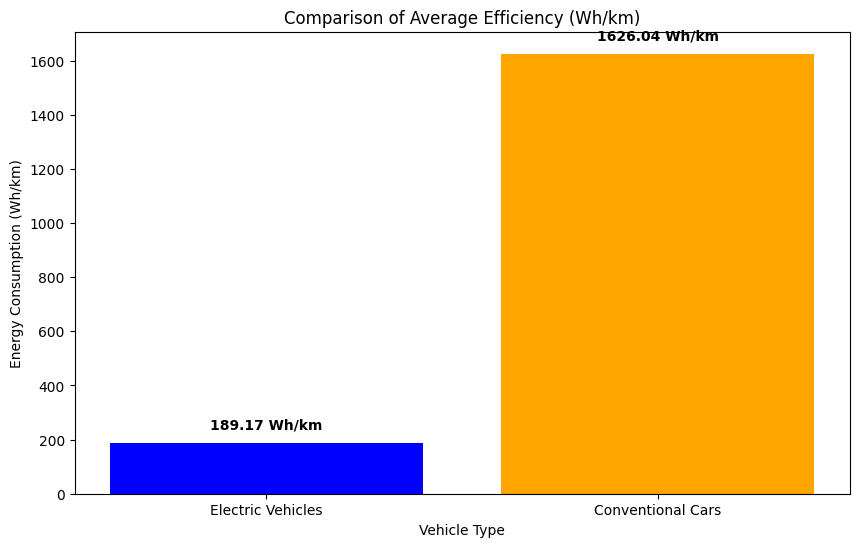

In [33]:
import matplotlib.pyplot as plt

# Values for comparison
average_efficiency_ev = 189.17  # in Wh/km
wh_per_km = 1626.04  # replace with the actual Wh/km value for conventional cars

# Labels and values for the bar chart
labels = ['Electric Vehicles', 'Conventional Cars']
values = [average_efficiency_ev, wh_per_km]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Comparison of Average Efficiency (Wh/km)')
plt.ylabel('Energy Consumption (Wh/km)')
plt.xlabel('Vehicle Type')

# Display the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 50, f"{v:.2f} Wh/km", ha='center', fontweight='bold')

# Show the plot
plt.show()


This stark difference in the energy consumption as can be seen from the above graph indicates that EVs are much more energy-efficient than fuel-powered vehicles. Thus, it can be inferred that EVs can prove much more beneficial to the economy in the long run as compared to conventional vehicle. This analysis empahasizes to use EVs not only for the benefit of environment, but for the economy as well.